# Text Representation: TF-IDF


### What is TF-IDF?

Term Frequency(TF) = [number of times word appeared / total no of words in a document]


Inverse Document Frequency(IDF) = [log(Total number of documents / number of documents that contains the word)]


TF-IDF = Term Frequency(TF) * Inverse Document Frequency(IDF)


In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

In [2]:
#let's create the vectorizer and fit the corpus and transform them accordingly

v = TfidfVectorizer()

transformed_output = v.fit_transform(corpus)


In [3]:
print(v.vocabulary_)

{'thor': 25, 'eating': 10, 'pizza': 22, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 14, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 12, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 27, 'are': 6, 'grapes': 13}


In [4]:
v.get_feature_names_out()

array(['already', 'am', 'amazon', 'and', 'announcing', 'apple', 'are',
       'ate', 'biryani', 'dot', 'eating', 'eco', 'google', 'grapes',
       'iphone', 'ironman', 'is', 'loki', 'microsoft', 'model', 'new',
       'pixel', 'pizza', 'surface', 'tesla', 'thor', 'tomorrow', 'you'],
      dtype=object)

In [5]:
#let's print the idf of each word:

all_feature_names = v.get_feature_names_out()

for word in all_feature_names:
    
    #let's get the index in the vocabulary
    
    idx = v.vocabulary_.get(word)
    
    #get the score
    idf_score=v.idf_[idx]
    
    print(f"{word} : {idf_score}")

already : 2.386294361119891
am : 2.386294361119891
amazon : 2.386294361119891
and : 2.386294361119891
announcing : 1.2876820724517808
apple : 2.386294361119891
are : 2.386294361119891
ate : 2.386294361119891
biryani : 2.386294361119891
dot : 2.386294361119891
eating : 1.9808292530117262
eco : 2.386294361119891
google : 2.386294361119891
grapes : 2.386294361119891
iphone : 2.386294361119891
ironman : 2.386294361119891
is : 1.1335313926245225
loki : 2.386294361119891
microsoft : 2.386294361119891
model : 2.386294361119891
new : 1.2876820724517808
pixel : 2.386294361119891
pizza : 2.386294361119891
surface : 2.386294361119891
tesla : 2.386294361119891
thor : 2.386294361119891
tomorrow : 1.2876820724517808
you : 2.386294361119891


In [6]:
#let's print the transformed output from tf-idf
print(transformed_output.toarray())

[[0.24266547 0.         0.         0.         0.         0.
  0.         0.24266547 0.         0.         0.40286636 0.
  0.         0.         0.         0.24266547 0.11527033 0.24266547
  0.         0.         0.         0.         0.72799642 0.
  0.         0.24266547 0.         0.        ]
 [0.         0.         0.         0.         0.30652086 0.5680354
  0.         0.         0.         0.         0.         0.
  0.         0.         0.5680354  0.         0.26982671 0.
  0.         0.         0.30652086 0.         0.         0.
  0.         0.         0.30652086 0.        ]
 [0.         0.         0.         0.         0.30652086 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.26982671 0.
  0.         0.5680354  0.30652086 0.         0.         0.
  0.5680354  0.         0.30652086 0.        ]
 [0.         0.         0.         0.         0.30652086 0.
  0.         0.         0.         0.         0.         0.
  0.

# Given a description about a product sold on e-commerce website, classify it in one of the 4 categories

Dataset : https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification

In [7]:
import pandas as pd

#read the data into a pandas dataframe
df = pd.read_csv("11_Ecommerce_data.csv")
print(df.shape)
df.head(5)

(24000, 2)


,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [8]:
#check the distribution of labels 
df['label'].value_counts()

Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: label, dtype: int64

In [9]:
df['label_num']=df.label.map({
    'Household':0,
    'Electronics':1,
    'Clothing & Accessories':2,
    'Books':3
})

df.head()

,Text,label,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,1
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,2
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,2


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(df.Text,
                                                 df.label_num,
                                                 test_size=0.2,
                                                 random_state=2023,
                                                 stratify=df.label_num)
                                                 

In [11]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (19200,)
Shape of X_test:  (4800,)


In [12]:
X_train.head()


9694     Bow Tie, Pocket Square and Cufflinks set in pa...
4839     XP-Pen Deco01 Digital Graphics Drawing Pen Tablet
17507    Apple iPad(6th Gen) Tablet (9.7 inch, 32GB, Wi...
10395    Aaj Jio NY Unisex Solid Cap (Black) Get the mu...
20804    Rapoo E1050 2.4G Anti-Splash Wireless Keyboard...
Name: Text, dtype: object

In [13]:
y_train.value_counts()


2    4800
1    4800
0    4800
3    4800
Name: label_num, dtype: int64

In [14]:
y_test.value_counts()


3    1200
1    1200
2    1200
0    1200
Name: label_num, dtype: int64

## Attempt 1 :

* using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

**Note:**

* use TF-IDF for pre-processing the text.

* use KNN as the classifier

* print the classification report.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1200
           1       0.97      0.97      0.97      1200
           2       0.98      0.98      0.98      1200
           3       0.96      0.95      0.96      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [16]:
X_test[:5]

16933    IBPS and SBI Bank PO Solved Papers Pre and Mai...
4480     Strontium Nitro A1 64GB Micro SDXC Memory Card...
376      Sona Women's Perfecto Full Coverage Non-Padded...
1236     McAfee Antivirus Plus - 1 User, 3 Years (Email...
17092    CalCore Luxury Comfort Orthopedic Memory Foam ...
Name: Text, dtype: object

In [17]:
y_test[:5]

16933    3
4480     1
376      2
1236     1
17092    0
Name: label_num, dtype: int64

In [18]:
y_pred[:5]


array([3, 1, 2, 1, 0])

## Attempt 2 :

* using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

**Note-**

* use TF-IDF for pre-processing the text.

* use MultinomialNB as the classifier.

* print the classification report.

In [19]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1200
           1       0.97      0.97      0.97      1200
           2       0.98      0.98      0.98      1200
           3       0.97      0.93      0.95      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



## Attempt 3 :

* using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

**Note:**


* use TF-IDF for pre-processing the text.

* use Random Forest as the classifier.

* print the classification report.

In [20]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1200
           1       0.99      0.97      0.98      1200
           2       0.98      0.99      0.98      1200
           3       0.97      0.97      0.97      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



## Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [21]:
### utlity function for pre-processing the text
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 


2023-09-02 05:03:56.613018: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
df['preprocessed_txt'] = df['Text'].apply(preprocess) 


In [23]:
df.head()

,Text,label,label_num,preprocessed_txt
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0,Urban Ladder Eisner low Study Office Computer ...
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0,contrast live Wooden Decorative Box Painted Bo...
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,1,IO Crest SY PCI40010 PCI raid Host Controller ...
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,2,ISAKAA Baby Socks bear 8 Years- Pack 4 6 8 12 ...
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,2,Indira Designer Women Art Mysore Silk Saree Bl...


In [24]:
df.Text[0]


'Urban Ladder Eisner Low Back Study-Office Computer Chair(Black) A study in simple. The Eisner study chair has a firm foam cushion, which makes long hours at your desk comfortable. The flexible meshed back is designed for air-circulation and support when you lean back. The curved arms provide ergonomic forearm support. Adjust the height using the gas lift to find that comfortable position and the nylon castors make it easy to move around your space. Chrome legs refer to the images for dimension details any assembly required will be done by the UL team at the time of delivery indoor use only.'

In [25]:
df.preprocessed_txt[0]


'Urban Ladder Eisner low Study Office Computer Chair(Black study simple Eisner study chair firm foam cushion make long hour desk comfortable flexible mesh design air circulation support lean curved arm provide ergonomic forearm support adjust height gas lift find comfortable position nylon castor easy space chrome leg refer image dimension detail assembly require UL team time delivery indoor use'

### Build a model with pre processed text



In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_txt, 
    df.label_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)


### Random Forest


In [27]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1200
           1       0.98      0.98      0.98      1200
           2       0.99      0.98      0.99      1200
           3       0.98      0.97      0.98      1200

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800



### Plot confusion matrix



In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1163,   11,   13,   13],
       [  17, 1176,    1,    6],
       [  10,    2, 1182,    6],
       [  17,   14,    3, 1166]])

Text(95.72222222222221, 0.5, 'Truth')

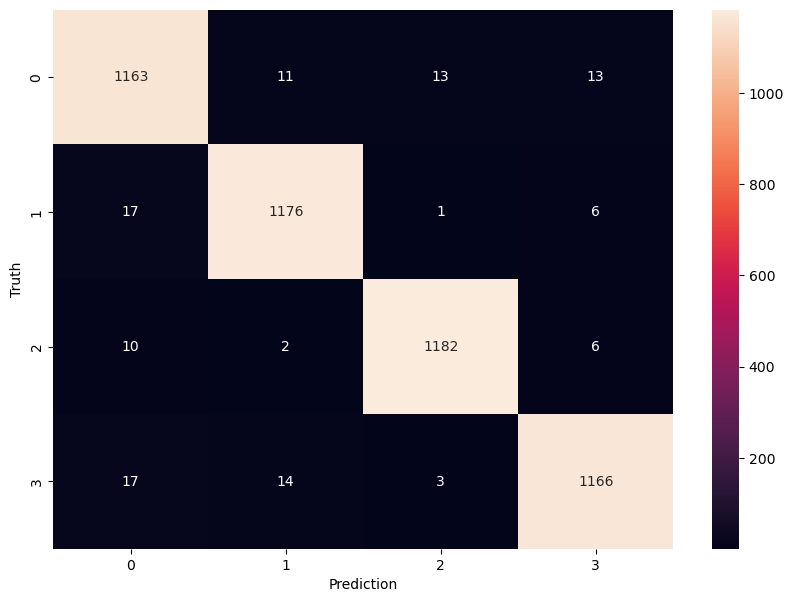

In [29]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')